In [1]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
from sklearn.linear_model import LinearRegression
import math
from scipy.optimize import curve_fit

In [2]:
loaded_node_temp= pd.read_pickle(Dict_temp_1_5)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_1_5)

In [3]:
#loaded_node_temp.keys()

In [4]:
temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 3:  # Make sure the list has at least 2 elements
        temperature .append(loaded_node_temp[key][2])

print(temperature )


[25.0011, 25.0028, 25.005, 25.0076, 25.0107, 25.0142, 25.0181, 25.0224, 25.0271, 25.0321, 25.0376, 25.0435, 25.0497, 25.0564, 25.0634, 25.0688, 25.0734, 25.0774, 25.0809, 25.0841, 25.0869, 25.0893, 25.0913, 25.093, 25.0944, 25.0954, 25.096, 25.0963, 25.0962, 25.0958, 25.0967, 25.0984, 25.1005, 25.1029, 25.1057, 25.1088, 25.1122, 25.1159, 25.1198, 25.124, 25.1286, 25.1334, 25.1384, 25.1438, 25.1494, 25.1541, 25.1583, 25.1622, 25.1658, 25.1693, 25.1725, 25.1755, 25.1784, 25.1811, 25.1836, 25.1859, 25.1881, 25.19, 25.1918, 25.1934, 25.1955, 25.1978, 25.2002, 25.2027, 25.2053, 25.208, 25.2107, 25.2135, 25.2164, 25.2193, 25.2223, 25.2254, 25.2285, 25.2317, 25.2349, 25.2382, 25.2416, 25.245, 25.2485, 25.252, 25.2557, 25.2593, 25.2631, 25.2669, 25.2707, 25.2747, 25.2787, 25.2827, 25.2868, 25.291, 25.2946, 25.2978, 25.3008, 25.3036, 25.3062, 25.3086, 25.3108, 25.3128, 25.3147, 25.3163, 25.3178, 25.3191, 25.3203, 25.3212, 25.322, 25.3238, 25.3262, 25.329, 25.3322, 25.3357, 25.3395, 25.3435, 25.

In [5]:

time = list(loaded_node_temp.keys())

Fitted 'a' coefficient: 25.00775439261072
Fitted 'b' coefficient: 0.15338668051002796


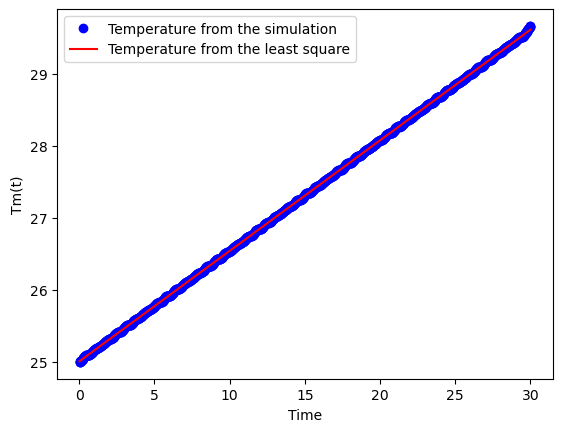

In [6]:
# Define the function Tm(t) = a + bt + ∑∆Tn cos(nωt + ϕn) for n = 1, 3, 5, 7
def tm_function(t, a, b, *params):
    result = a + b * t
    num_terms = len(params) // 2  # Since each term has both ∆Tn and ϕn
    for n in range(1, num_terms + 1):
        delta_Tn = params[2*n - 2]
        phi_n = params[2*n - 1]
        result += delta_Tn * np.cos(n * omega * t + phi_n)
        
    return result


time= np.array(time)

# Initial guess for parameters
initial_guess = [1.0, 1.0] + [0.0, 0.0, 0.0, 0.0]  # [a, b, ∆T1, ϕ1, ∆T3, ϕ3, ∆T5, ϕ5, ∆T7, ϕ7]

# Angular frequency
omega = 2 * np.pi*0.182

# Perform the curve fitting
popt, _ = curve_fit(tm_function, time, temperature, p0=initial_guess)


a_fit = popt[0]
b_fit = popt[1]

print("Fitted 'a' coefficient:", a_fit)
print("Fitted 'b' coefficient:", b_fit)

# Generate fitted curve using the fitted coefficients
fitted_curve = tm_function(time, *popt)


plt.plot(time, temperature, 'bo', label='Temperature from the simulation')
plt.plot(time, fitted_curve, 'r-', label='Temperature from the least square')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()


In [7]:
popt

array([ 2.50077544e+01,  1.53386681e-01, -6.52538507e-04,  3.74282104e-01,
        4.99006416e-04,  4.78437828e-01])

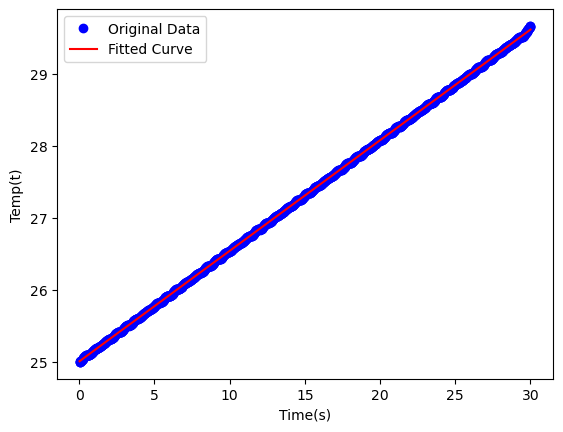

In [8]:
new_node_temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 100:  
        new_node_temperature.append(loaded_node_temp[key][4])

plt.plot(time, new_node_temperature, 'bo', label='Original Data')
plt.plot(time,  fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Time(s)')
plt.ylabel('Temp(t)')
plt.legend()
plt.show()

In [9]:
Error= abs((temperature- fitted_curve)/temperature)

In [10]:
np.mean(Error)*100

0.025840045492878615

In [11]:
#0∘=∑𝑡sin(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡),
(1)
#90∘=∑𝑡cos(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡).
# https://www.mdpi.com/2076-3417/13/7/4094
#https://www.sciencedirect.com/science/article/abs/pii/S0026271410003550

1